# Mental Health Prediction using Machine Learning Models

In [ ]:
# Import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Import required packages for Scaling Numerical input data
import sklearn
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# read data from the file and load in to dataframe
df = pd.read_csv("datasets_Health_survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,8/27/2014 11:29,37,Female,United States,IL,No,No,Yes,Often,25-Jun,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,8/27/2014 11:29,44,Male,United States,IN,No,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Yes,No,NaN
2,8/27/2014 11:29,32,Male,Canada,NaN,No,No,No,Rarely,25-Jun,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,8/27/2014 11:29,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,8/27/2014 11:30,31,Male,United States,TX,No,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Yes,No,NaN


In [3]:
# Retrive the number of rows and columns in data frame
df.shape

(1259, 27)

In [4]:
# Retrive the data types of the columns
df.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [5]:
# Retrive the stats of numeric fields
print("Describe Data")
print(df.describe())

Describe Data
               Age
count  1259.000000
mean     32.057983
std       7.297165
min      11.000000
25%      27.000000
50%      31.000000
75%      36.000000
max      72.000000


In [6]:
# Retrive the stats of categorical Fields
print("Summarized Data")
print(df.describe(include=['O']))

Summarized Data
              Timestamp Gender        Country state self_employed  \
count              1259   1259           1259   744          1259   
unique              884      2             48    45             2   
top     8/27/2014 15:24   Male  United States    CA            No   
freq                  8   1011            751   138          1113   

       family_history treatment work_interfere no_employees remote_work  ...  \
count            1259      1259            995         1259        1259  ...   
unique              2         2              4            6           2  ...   
top                No       Yes      Sometimes       25-Jun          No  ...   
freq              767       637            465          290         883  ...   

             leave mental_health_consequence phys_health_consequence  \
count         1259                      1259                    1259   
unique           5                         3                       3   
top     Don't know   

In [7]:
#Verify the data if there are any duplicates

dup_df = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(dup_df)

Duplicate Rows except first occurrence based on all columns are :
           Timestamp  Age Gender         Country state self_employed  \
860  8/28/2014 17:02   32   Male  United Kingdom   NaN            No   

    family_history treatment work_interfere no_employees  ...       leave  \
860            Yes       Yes         Rarely       25-Jun  ...  Don't know   

    mental_health_consequence phys_health_consequence     coworkers  \
860                       Yes                   Maybe  Some of them   

    supervisor mental_health_interview phys_health_interview  \
860         No                      No                    No   

    mental_vs_physical obs_consequence comments  
860                 No              No      NaN  

[1 rows x 27 columns]


In [8]:
# Checking the count of null values in each column
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                   0
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

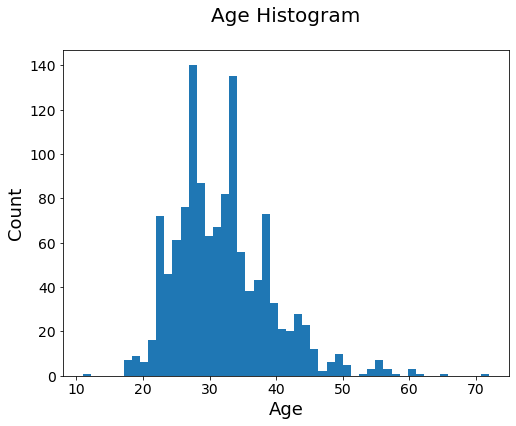

In [9]:
# Plot a histogram on the Age
ax=df['Age'].plot(kind='hist', bins=50, fontsize=14, figsize=(8,6))
ax.set_title('Age Histogram\n', fontsize=20)
ax.set_ylabel('Count', fontsize=18)
ax.set_xlabel('Age', fontsize=18);
plt.show()

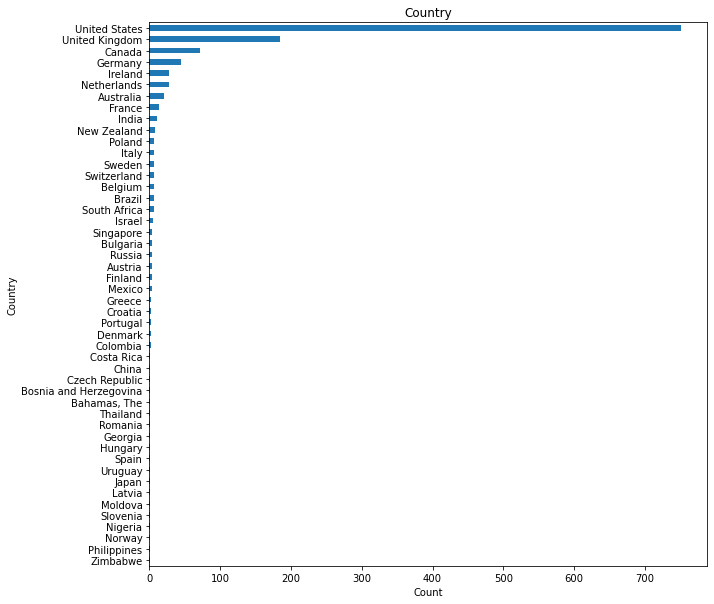

In [10]:
#display bar chart of Country sorted by counts
plt.figure(figsize=(10,10))
df.groupby(['Country']).size().sort_values(ascending=True).plot(kind='barh')
plt.xlabel('Count')
plt.title('Country')
plt.show()

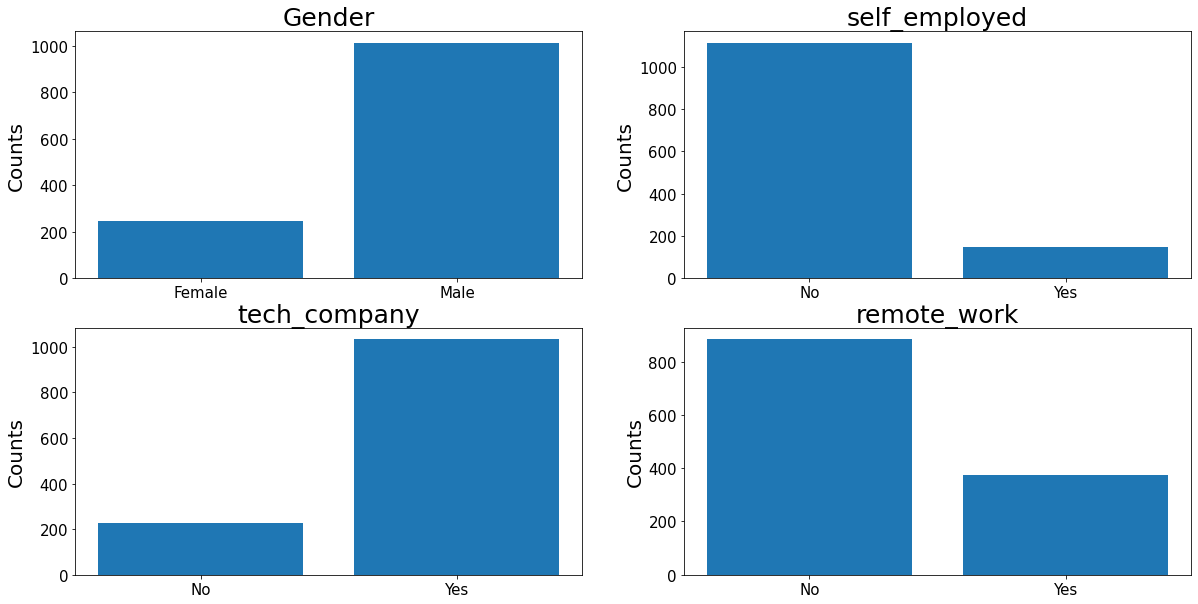

In [11]:
#Barcharts: 
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visulizer
X_Gender = df.replace({'Gender': {1: 'Male', 0: 'Female'}}).groupby('Gender').size().reset_index(name='Counts')['Gender']
Y_Gender = df.replace({'Gender': {1: 'Male', 0: 'Female'}}).groupby('Gender').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Gender, Y_Gender)
axes[0, 0].set_title('Gender', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_self_employed = df.replace({'self_employed': {1: 'Yes', 2: 'No'}}).groupby('self_employed').size().reset_index(name='Counts')['self_employed']
Y_self_employed = df.replace({'self_employed': {1: 'Yes', 2: 'No'}}).groupby('self_employed').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_self_employed, Y_self_employed)
axes[0, 1].set_title('self_employed', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_tech_company = df.replace({'tech_company': {1: 'Yes', 2: 'No'}}).groupby('tech_company').size().reset_index(name='Counts')['tech_company']
Y_tech_company = df.replace({'tech_company': {1: 'Yes', 2: 'No'}}).groupby('tech_company').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_tech_company, Y_tech_company)
axes[1, 0].set_title('tech_company', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_remote_work = df.replace({'remote_work': {1: 'Yes', 2: 'No'}}).groupby('remote_work').size().reset_index(name='Counts')['remote_work']
Y_remote_work = df.replace({'remote_work': {1: 'Yes', 2: 'No'}}).groupby('remote_work').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_remote_work, Y_remote_work)
axes[1, 1].set_title('remote_work', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()

In [12]:
# Number of elements in the dataframe 
df.shape

(1259, 27)

In [13]:
#the Country = 'United States' has maximum number of observations 
#Filter data in the dataframe data for 'United States'

df_USA = df[df['Country']=='United States']
df_USA.shape

(751, 27)

In [14]:
# Selecting the few set of variables for the analysis
#'Age', 'Gender','self_employed', 'tech_company', 'remote_work','family_history','obs_consequence'
df_USA_dataset = df_USA[['Age', 'Gender','self_employed', 'tech_company', 'remote_work','family_history','obs_consequence']]
df_USA_dataset.shape

(751, 7)

In [15]:
df_USA_dataset.head()

,Age,Gender,self_employed,tech_company,remote_work,family_history,obs_consequence
0,37,Female,No,Yes,No,No,No
1,44,Male,No,No,No,No,No
4,31,Male,No,Yes,Yes,No,No
5,33,Male,No,Yes,No,Yes,No
6,35,Female,No,Yes,Yes,Yes,No


In [16]:
df_USA_dataset.describe(include=['O'])

,Gender,self_employed,tech_company,remote_work,family_history,obs_consequence
count,751,751,751,751,751,751
unique,2,2,2,2,2,2
top,Male,No,Yes,No,No,No
freq,571,695,611,513,421,662


In [17]:
# Checking the count of null values in each column
df_USA_dataset.isnull().sum()

Age                0
Gender             0
self_employed      0
tech_company       0
remote_work        0
family_history     0
obs_consequence    0
dtype: int64

In [18]:
# Checking for the duplicate data in the dataframe
dup_df_USA_dataset = df_USA_dataset[df_USA_dataset.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
dup_df_USA_dataset.shape

Duplicate Rows except first occurrence based on all columns are :


(387, 7)

In [19]:
# Removing Duplicates and reseting the index
df_USA_dataset.drop_duplicates(keep=False,inplace=True)
df_USA_dataset = df_USA_dataset.reset_index(drop=True)
print(df_USA_dataset.shape)
df_USA_dataset.head()

(219, 7)


<ipython-input-19-30ed41ce1910>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_dataset.drop_duplicates(keep=False,inplace=True)


,Age,Gender,self_employed,tech_company,remote_work,family_history,obs_consequence
0,44,Male,No,No,No,No,No
1,42,Female,No,Yes,No,Yes,No
2,42,Female,No,No,No,Yes,Yes
3,46,Male,Yes,Yes,Yes,Yes,Yes
4,31,Male,Yes,Yes,Yes,No,No


In [20]:
# Splitting the data in to 3 differnt data sets
df_USA_dataset_Age = df_USA_dataset[['Age']]
df_USA_dataset_Categorical = df_USA_dataset[['Gender','self_employed', 'tech_company', 'remote_work','family_history']]
df_USA_dataset_Label = df_USA_dataset[['obs_consequence']]
print('Number of elements in the Filtered dataframe ',df_USA_dataset.shape)
print('Number of elements in the Input Numerical dataframe ',df_USA_dataset_Age.shape)
print('Number of elements in the Input Categorical dataframe ',df_USA_dataset_Categorical.shape)
print('Number of elements in the Output Categorical dataframe ',df_USA_dataset_Label.shape)

Number of elements in the Filtered dataframe  (219, 7)
Number of elements in the Input Numerical dataframe  (219, 1)
Number of elements in the Input Categorical dataframe  (219, 5)
Number of elements in the Output Categorical dataframe  (219, 1)


In [21]:
# applying MinMax Scaler
scaler=MinMaxScaler()
scaler.fit(df_USA_dataset_Age)

MinMaxScaler()

In [22]:
# Transform Scaled data
df_USA_dataset_Age=scaler.transform(df_USA_dataset_Age)

In [23]:
# Convert the data to DataFrame
df_USA_dataset_Age = pd.DataFrame(df_USA_dataset_Age)
df_USA_dataset_Age.columns = ['Age']
df_USA_dataset_Age.head()


,Age
0,0.540984
1,0.508197
2,0.508197
3,0.573770
4,0.327869


In [24]:
# Display the stats of the data after applying MinMax Scaler
print(df_USA_dataset_Age.describe())

              Age
count  219.000000
mean     0.409462
std      0.165993
min      0.000000
25%      0.286885
50%      0.393443
75%      0.508197
max      1.000000


In [25]:
# convert the Categorical data to Numerical data
# One Hot Encoding 
df_USA_dataset_Categorical = pd.get_dummies(df_USA_dataset_Categorical)
# check the data
df_USA_dataset_Categorical.head()

,Gender_Female,Gender_Male,self_employed_No,self_employed_Yes,tech_company_No,tech_company_Yes,remote_work_No,remote_work_Yes,family_history_No,family_history_Yes
0,0,1,1,0,1,0,1,0,1,0
1,1,0,1,0,0,1,1,0,0,1
2,1,0,1,0,1,0,1,0,0,1
3,0,1,0,1,0,1,0,1,0,1
4,0,1,0,1,0,1,0,1,1,0


In [26]:
# Concatenate the Numerical and Categorical Data
x_df_USA_dataset = pd.concat([df_USA_dataset_Age, df_USA_dataset_Categorical], axis=1)
x_df_USA_dataset.head()

,Age,Gender_Female,Gender_Male,self_employed_No,self_employed_Yes,tech_company_No,tech_company_Yes,remote_work_No,remote_work_Yes,family_history_No,family_history_Yes
0,0.540984,0,1,1,0,1,0,1,0,1,0
1,0.508197,1,0,1,0,0,1,1,0,0,1
2,0.508197,1,0,1,0,1,0,1,0,0,1
3,0.573770,0,1,0,1,0,1,0,1,0,1
4,0.327869,0,1,0,1,0,1,0,1,1,0


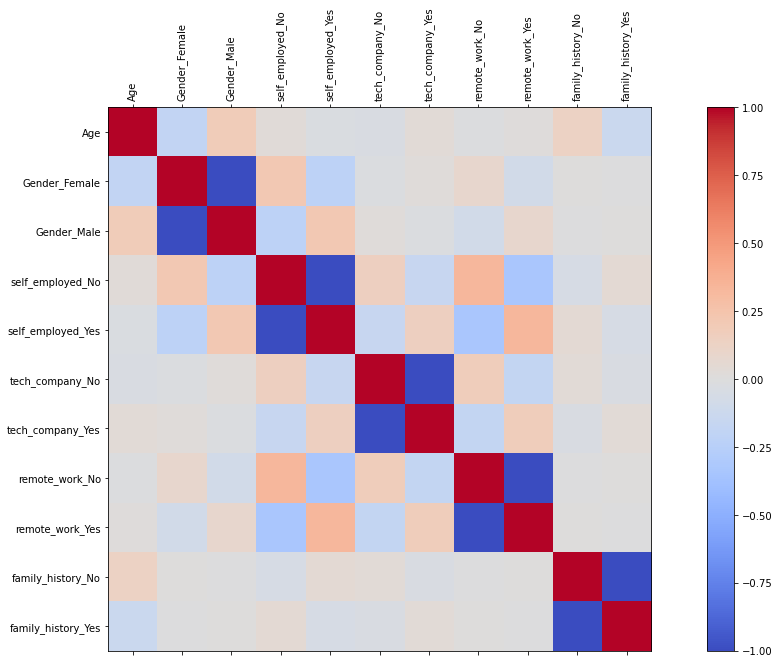

In [27]:
# Plot correlation map to file the corelation between variables

corr = x_df_USA_dataset.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(x_df_USA_dataset.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(x_df_USA_dataset.columns)
ax.set_yticklabels(x_df_USA_dataset.columns)
plt.show()

In [28]:
# import the required package for applying PCA
import sklearn.decomposition
from sklearn.decomposition import PCA

In [29]:
# reducing the number of companents to 2 using PCA
pca=PCA(n_components=2)
pca.fit(x_df_USA_dataset)

PCA(n_components=2)

In [30]:
# Transform the data after applying PCA
x_df_USA_dataset_PCA = pca.transform(x_df_USA_dataset)

In [31]:
print('Number of elements in the data frame after applying PCA ')
x_df_USA_dataset_PCA.shape

Number of elements in the data frame after applying PCA 


(219, 2)

In [32]:
# Display the input data which is converted to 2 components using PCA
x_df_USA_dataset_PCA = pd.DataFrame(x_df_USA_dataset_PCA)
x_df_USA_dataset_PCA.columns = ['PCA_Component_1','PCA_Component_2']
x_df_USA_dataset_PCA.head()

,PCA_Component_1,PCA_Component_2
0,-0.736660,1.091117
1,-0.732414,-0.936833
2,-1.289913,-0.567923
3,1.428846,-0.544099
4,1.439015,0.760589


Split the data into test and train

In [33]:
x_df_USA_dataset.head()

,Age,Gender_Female,Gender_Male,self_employed_No,self_employed_Yes,tech_company_No,tech_company_Yes,remote_work_No,remote_work_Yes,family_history_No,family_history_Yes
0,0.540984,0,1,1,0,1,0,1,0,1,0
1,0.508197,1,0,1,0,0,1,1,0,0,1
2,0.508197,1,0,1,0,1,0,1,0,0,1
3,0.573770,0,1,0,1,0,1,0,1,0,1
4,0.327869,0,1,0,1,0,1,0,1,1,0


In [34]:
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()
#y_df_USA_dataset= pd.DataFrame(lbl.fit_transform(df_USA_dataset_Label))
y_df_USA_dataset= lbl.fit_transform(df_USA_dataset_Label)

#y_df_USA_dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [35]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_test, y_train, y_test = train_test_split(x_df_USA_dataset, y_df_USA_dataset, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_test.shape[0])

No. of samples in training set:  153
No. of samples in validation set: 66


# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

log_regression = LogisticRegression()
log_regression.fit(X_train,y_train)
target_names = ['obs_consequence_YES', 'obs_consequence_NO']

In [37]:
#Testing dataset
y_pred_log = log_regression.predict(X_test)
cm_tt_log = confusion_matrix(y_test,y_pred_log)
TP = cm_tt_log[1, 1]
TN = cm_tt_log[0, 0]
FP = cm_tt_log[0, 1]
FN = cm_tt_log[1, 0]

print("Testing Set Confusion Matrix 'LogisticRegression': \n",cm_tt_log)
print("\nTesting Set Classification_Report 'LogisticRegression':")
print(classification_report(y_test,y_pred_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Test Set Accuracy LR: ",accuracy_score(y_test,y_pred_log))
print("Test Set Sensitivity LR: ",sensitivity_log_train)
print("Test Set Specificity LR: ",specificity_log_train)

Testing Set Confusion Matrix 'LogisticRegression': 
 [[44  0]
 [22  0]]

Testing Set Classification_Report 'LogisticRegression':
                     precision    recall  f1-score   support

obs_consequence_YES       0.67      1.00      0.80        44
 obs_consequence_NO       0.00      0.00      0.00        22

           accuracy                           0.67        66
          macro avg       0.33      0.50      0.40        66
       weighted avg       0.44      0.67      0.53        66

Test Set Accuracy LR:  0.6666666666666666
Test Set Sensitivity LR:  0.0
Test Set Specificity LR:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
#Training Set
y_train_log = log_regression.predict(X_train)
cm_tr_log = confusion_matrix(y_train,y_train_log)
TP = cm_tr_log[1, 1]
TN = cm_tr_log[0, 0]
FP = cm_tr_log[0, 1]
FN = cm_tr_log[1, 0]

print("Training Set Confusion Matrix 'LogisticRegression': \n",cm_tr_log)
print("\nTraining Set Classification_Report 'LogisticRegression':")
print(classification_report(y_train,y_train_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Training Set Accuracy LR: ",accuracy_score(y_train,y_train_log))
print("Training Set Sensitivity LR: ",sensitivity_log_train)
print("Training Set Specificity LR: ",specificity_log_train)

Training Set Confusion Matrix 'LogisticRegression': 
 [[119   0]
 [ 34   0]]

Training Set Classification_Report 'LogisticRegression':
                     precision    recall  f1-score   support

obs_consequence_YES       0.78      1.00      0.88       119
 obs_consequence_NO       0.00      0.00      0.00        34

           accuracy                           0.78       153
          macro avg       0.39      0.50      0.44       153
       weighted avg       0.60      0.78      0.68       153

Training Set Accuracy LR:  0.7777777777777778
Training Set Sensitivity LR:  0.0
Training Set Specificity LR:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# AdaBoost Classifier

In [39]:
#AdaBoosting
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
ada_class = AdaBoostClassifier(n_estimators=1000)
ada_class.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=1000)

In [40]:
# Testing Dataset
y_pred_log = ada_class.predict(X_test)
cm_tt_log = confusion_matrix(y_test,y_pred_log)
TP = cm_tt_log[1, 1]
TN = cm_tt_log[0, 0]
FP = cm_tt_log[0, 1]
FN = cm_tt_log[1, 0]

print("Testing Set Confusion Matrix 'AdaBoostClassifier': \n",cm_tt_log)
print("\nTesting Set Classification_Report 'AdaBoostClassifier':")
print(classification_report(y_test,y_pred_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Test Set Accuracy AB: ",accuracy_score(y_test,y_pred_log))
print("Test Set Sensitivity AB: ",sensitivity_log_train)
print("Test Set Specificity AB: ",specificity_log_train)


Testing Set Confusion Matrix 'AdaBoostClassifier': 
 [[42  2]
 [19  3]]

Testing Set Classification_Report 'AdaBoostClassifier':
                     precision    recall  f1-score   support

obs_consequence_YES       0.69      0.95      0.80        44
 obs_consequence_NO       0.60      0.14      0.22        22

           accuracy                           0.68        66
          macro avg       0.64      0.55      0.51        66
       weighted avg       0.66      0.68      0.61        66

Test Set Accuracy AB:  0.6818181818181818
Test Set Sensitivity AB:  0.13636363636363635
Test Set Specificity AB:  0.9545454545454546


In [41]:
#Training Set
y_train_log = ada_class.predict(X_train)
cm_tr_log = confusion_matrix(y_train,y_train_log)

TP = cm_tr_log[1, 1]
TN = cm_tr_log[0, 0]
FP = cm_tr_log[0, 1]
FN = cm_tr_log[1, 0]

print("Training Set Confusion Matrix 'AdaBoostClassifier': \n",cm_tr_log)
print("\nTraining Set Classification_Report 'AdaBoostClassifier':")
print(classification_report(y_train,y_train_log, target_names = target_names))

sensitivity_log_train = TP/(FN+TP)  # TP/(FN+TP)
specificity_log_train = TN/(TN+FP)  # TN/(TN+FP)
print("Training Set Accuracy AB: ",accuracy_score(y_train,y_train_log))
print("Training Set Sensitivity AB: ",sensitivity_log_train)
print("Training Set Specificity AB: ",specificity_log_train)

Training Set Confusion Matrix 'AdaBoostClassifier': 
 [[111   8]
 [ 18  16]]

Training Set Classification_Report 'AdaBoostClassifier':
                     precision    recall  f1-score   support

obs_consequence_YES       0.86      0.93      0.90       119
 obs_consequence_NO       0.67      0.47      0.55        34

           accuracy                           0.83       153
          macro avg       0.76      0.70      0.72       153
       weighted avg       0.82      0.83      0.82       153

Training Set Accuracy AB:  0.8300653594771242
Training Set Sensitivity AB:  0.47058823529411764
Training Set Specificity AB:  0.9327731092436975


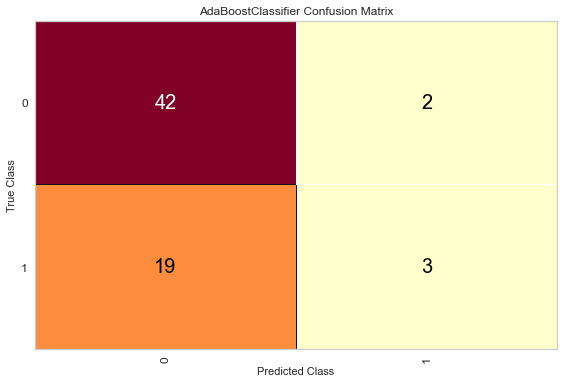

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [42]:
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

#The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(ada_class, target_names=target_names, percent=False)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()


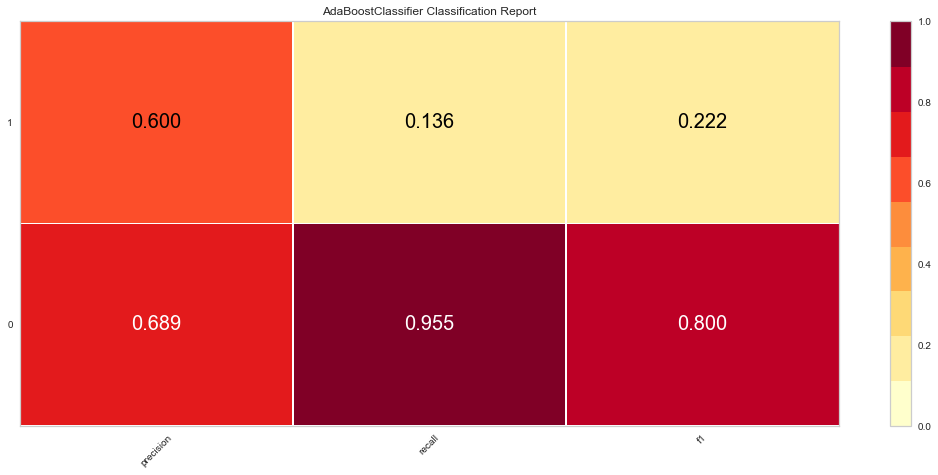

In [43]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(ada_class, target_names=target_names)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()

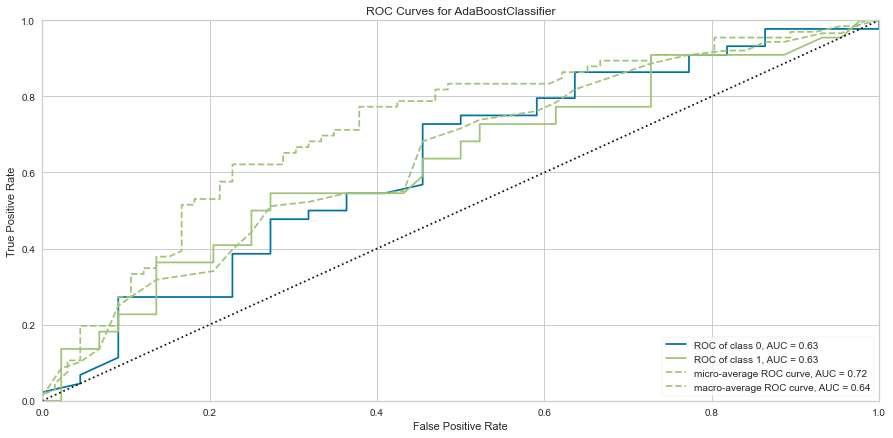

In [44]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(ada_class)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()